# CODE WORKUP

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn rdkit-pypi biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 3.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.7 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
!pip install rdkit-pypi

In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
from tqdm.notebook import tqdm

/Users/vitikapatel/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load the Datasets

In [7]:
taxol1 = pd.read_csv("Taxol_FDA.csv")
taxol2 = pd.read_csv("Taxol_FDA.tsv", sep = "\t")
ana = pd.read_csv("Anastrozole_DB01217.tsv")
doxo1 = pd.read_csv("Doxorubicin_Hydrochloride_db00997.tsv")
doxo2 = pd.read_csv("Doxorubicin_Hydrochloride.tsv")
Evero = pd.read_csv("Everolimus_207486.tsv")
Exemes = pd.read_csv("Exemestane_DB00990.tsv")
fluoro = pd.read_csv("Fluorouracil.tsv")

## Concatanate and cleaning the datasets

In [12]:
DTI_df = pd.concat([taxol1, taxol2, ana, doxo1, doxo2, Evero, Exemes, fluoro], ignore_index = True)

In [14]:
DTI_df = DTI_df.rename(columns={
    'Ligand SMILES': 'SMILES',
    'BindingDB Target Chain  Sequence': 'Sequence',
    'Ki (nM)': 'Ki',
    'IC50 (nM)': 'IC50',
    'Kd (nM)': 'Kd'
})

DTI_df["Affinity"] = DTI_df[['Ki','IC50', 'Kd']].bfill(axis=1).iloc[:, 0]
DTI_df = DTI_df.dropna(subset=['SMILES', 'Sequence', 'Affinity']).reset_index(drop=True)

/var/folders/5l/39kl6j1x78n8qfb66qfbmf4m0000gn/T/ipykernel_7130/1579133274.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DTI_df["Affinity"] = DTI_df[['Ki','IC50', 'Kd']].bfill(axis=1).iloc[:, 0]


In [15]:
DTI_df

,Unnamed: 0,BindingDB Reactant_set_id,SMILES,Ligand InChI,Ligand InChI Key,BindingDB MonomerID,BindingDB Ligand Name,Target Name Assigned by Curator or DataSource,Target Source Organism According to Curator or DataSource,Ki,...,UniProt (SwissProt) Entry Name of Target Chain.1,UniProt (SwissProt) Primary ID of Target Chain.1,UniProt (SwissProt) Secondary ID(s) of Target Chain.1,UniProt (SwissProt) Alternative ID(s) of Target Chain.1,UniProt (TrEMBL) Submitted Name of Target Chain.1,UniProt (TrEMBL) Entry Name of Target Chain.1,UniProt (TrEMBL) Primary ID of Target Chain.1,UniProt (TrEMBL) Secondary ID(s) of Target Chain.1,UniProt (TrEMBL) Alternative ID(s) of Target Chain.1,Affinity
0,0.0,339317,CC(=O)O[C@@H]1C2=C(C)[C@H](C[C@@](O)([C@@H](OC...,InChI=1/C47H51NO14/c1-25-31(60-43(56)36(52)35(...,RCINICONZNJXQF-IOLPPJGBNA-N,50001839,CHEMBL428647::PACLITAXEL::taxol,Serum paraoxonase/arylesterase 1,Homo sapiens,16500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16500.0
1,1.0,397496,CC(=O)O[C@@H]1C2=C(C)[C@H](C[C@@](O)([C@@H](OC...,InChI=1/C47H51NO14/c1-25-31(60-43(56)36(52)35(...,RCINICONZNJXQF-IOLPPJGBNA-N,50001839,CHEMBL428647::PACLITAXEL::taxol,P-gp nanodisc·BD-vinblastine,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.27e+5
2,2.0,408603,CC(=O)O[C@@H]1C2=C(C)[C@H](C[C@@](O)([C@@H](OC...,InChI=1/C47H51NO14/c1-25-31(60-43(56)36(52)35(...,RCINICONZNJXQF-IOLPPJGBNA-N,50001839,CHEMBL428647::PACLITAXEL::taxol,Uridine-5&#39;-diphosphoglucuronosyltransferas...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0e+4
3,3.0,408623,CC(=O)O[C@@H]1C2=C(C)[C@H](C[C@@](O)([C@@H](OC...,InChI=1/C47H51NO14/c1-25-31(60-43(56)36(52)35(...,RCINICONZNJXQF-IOLPPJGBNA-N,50001839,CHEMBL428647::PACLITAXEL::taxol,Uridine-5&#39;-diphosphoglucuronosyltransferas...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.9e+3
4,4.0,408641,CC(=O)O[C@@H]1C2=C(C)[C@H](C[C@@](O)([C@@H](OC...,InChI=1/C47H51NO14/c1-25-31(60-43(56)36(52)35(...,RCINICONZNJXQF-IOLPPJGBNA-N,50001839,CHEMBL428647::PACLITAXEL::taxol,Uridine-5&#39;-diphosphoglucuronosyltransferas...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.4e+4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,7.0,50774599,CO[C@@H]1C[C@H](C[C@@H](C)[C@@H]2CC(=O)[C@H](C...,InChI=1/C53H83NO14/c1-32-16-12-11-13-17-33(2)4...,HKVAMNSJSFKALM-ODLDZJDANA-N,50088378,Afinitor::Afinitor Disperz::CHEBI:68478::EVERO...,Multidrug resistance-associated protein 4,Homo sapiens,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95000.0
181,8.0,50774881,CO[C@@H]1C[C@H](C[C@@H](C)[C@@H]2CC(=O)[C@H](C...,InChI=1/C53H83NO14/c1-32-16-12-11-13-17-33(2)4...,HKVAMNSJSFKALM-ODLDZJDANA-N,50088378,Afinitor::Afinitor Disperz::CHEBI:68478::EVERO...,Bile salt export pump,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0
182,9.0,50775687,CO[C@@H]1C[C@H](C[C@@H](C)[C@@H]2CC(=O)[C@H](C...,InChI=1/C53H83NO14/c1-32-16-12-11-13-17-33(2)4...,HKVAMNSJSFKALM-ODLDZJDANA-N,50088378,Afinitor::Afinitor Disperz::CHEBI:68478::EVERO...,Canalicular multispecific organic anion transp...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11300.0
183,10.0,50776325,CO[C@@H]1C[C@H](C[C@@H](C)[C@@H]2CC(=O)[C@H](C...,InChI=1/C53H83NO14/c1-32-16-12-11-13-17-33(2)4...,HKVAMNSJSFKALM-ODLDZJDANA-N,50088378,Afinitor::Afinitor Disperz::CHEBI:68478::EVERO...,Canalicular multispecific organic anion transp...,Homo sapiens,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84000.0


In [16]:
def clean_affinity(x):
    if isinstance(x, str):
        x = x.replace('<', '').replace('>', '').replace('nM', '').strip()
    try:
        return float(x)
    except:
        return None

In [17]:
DTI_df['Affinity'] = DTI_df['Affinity'].apply(clean_affinity)
DTI_df = DTI_df.dropna(subset=['Affinity'])

DTI_df['Activity'] = DTI_df['Affinity'].apply(lambda x: 1 if x <= 1000 else 0)

In [18]:
print("Final shape:",DTI_df.shape)
print("Activity class distribution:")
print(DTI_df['Activity'].value_counts())

DTI_df[['SMILES', 'Sequence', 'Affinity', 'Activity']].head() #Final cleaned dataset

Final shape: (185, 64)
Activity class distribution:
Activity
0    150
1     35
Name: count, dtype: int64


,SMILES,Sequence,Affinity,Activity
0,CC(=O)O[C@@H]1C2=C(C)[C@H](C[C@@](O)([C@@H](OC...,MAKLIALTLLGMGLALFRNHQSSYQTRLNALREVQPVELPNCNLVK...,16500.0,0
1,CC(=O)O[C@@H]1C2=C(C)[C@H](C[C@@](O)([C@@H](OC...,MELEEDLKGRADKNFSKMGKKSKKEKKEKKPAVSVLTMFRYAGWLD...,327000.0,0
2,CC(=O)O[C@@H]1C2=C(C)[C@H](C[C@@](O)([C@@H](OC...,MAVESQGGRPLVLGLLLCVLGPVVSHAGKILLIPVDGSHWLSMLGA...,20000.0,0
3,CC(=O)O[C@@H]1C2=C(C)[C@H](C[C@@](O)([C@@H](OC...,MARGLQVPLPRLATGLLLLLSVQPWAESGKVLVVPTDGSPWLSMRE...,4900.0,0
4,CC(=O)O[C@@H]1C2=C(C)[C@H](C[C@@](O)([C@@H](OC...,MACLLRSFQRISAGVFFLALWGMVVGDKLLVVPQDGSHWLSMKDIV...,74000.0,0


## Protein Feature Extraction — Amino Acid Composition (AAC)

In [31]:
from collections import Counter
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()

In [32]:
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")

In [33]:
# Function to calculate amino acid composition
def compute_aac(seq):
    seq = seq.upper()
    total = len(seq)
    counts = Counter(seq)
    return [counts.get(aa, 0) / total if total > 0 else 0 for aa in amino_acids]

In [35]:
def mol_to_ecfp(smiles, radius=2, nBits=1024):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return np.zeros(nBits)
    return np.array(AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits))

In [36]:
# Apply AAC calculation to each sequence
X_proteins = DTI_df['Sequence'].apply(compute_aac)
X_proteins_matrix = np.vstack(X_proteins.values)  # shape: (n_samples, 20)
X_drugs = DTI_df['SMILES'].progress_apply(mol_to_ecfp)
X_drugs_matrix = np.vstack(X_drugs.values)

  0%|          | 0/185 [00:00<?, ?it/s]

In [37]:
print("Protein feature matrix shape:", X_proteins_matrix.shape)

Protein feature matrix shape: (185, 20)


## Model Building and Evaluation

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [41]:
X = np.hstack((X_drugs_matrix, X_proteins_matrix))  # shape: (n_samples, 1044)
y = DTI_df['Activity'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

In [42]:
# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.972972972972973
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.86      0.92         7

    accuracy                           0.97        37
   macro avg       0.98      0.93      0.95        37
weighted avg       0.97      0.97      0.97        37

ROC AUC: 1.0


## ROC Curve

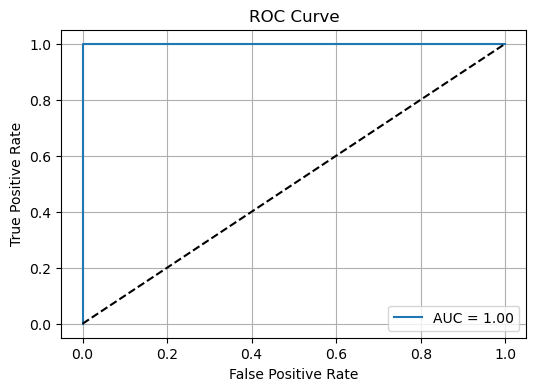

In [44]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5, scoring='roc_auc')
print("Cross-validated AUC scores:", scores)
print("Mean AUC:", scores.mean())

Cross-validated AUC scores: [0.99761905 0.99761905 0.95       0.98571429 0.97857143]
Mean AUC: 0.981904761904762


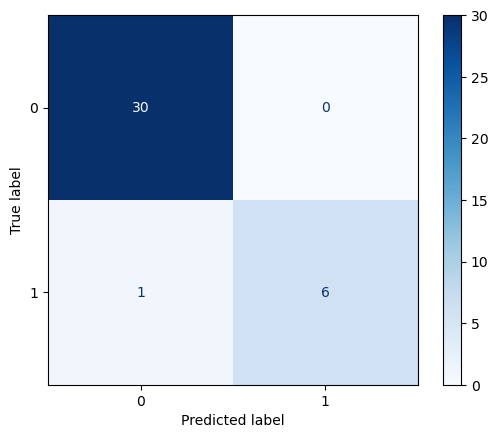

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()


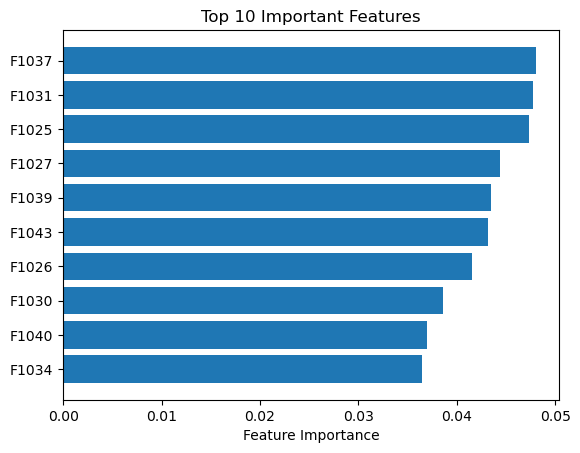

In [47]:
importances = clf.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10

plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [f"F{i}" for i in indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features")
plt.show()

## XGBoost Classifier

In [48]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.9 MB/s eta 0:00:00a 0:00:01


In [49]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

In [50]:
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [52]:
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_prob_xgb))

Accuracy: 0.972972972972973
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.86      0.92         7

    accuracy                           0.97        37
   macro avg       0.98      0.93      0.95        37
weighted avg       0.97      0.97      0.97        37

ROC AUC: 0.9857142857142858


/Users/vitikapatel/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [18:29:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


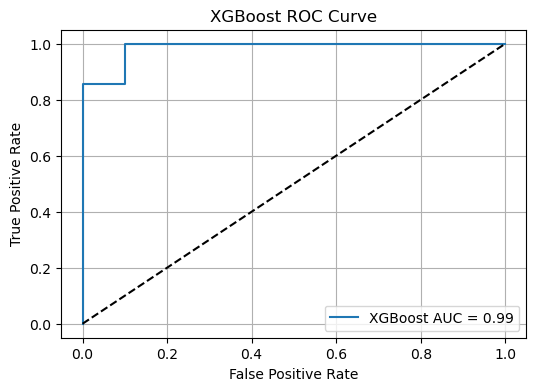

In [53]:
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"XGBoost AUC = {roc_auc_score(y_test, y_prob_xgb):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

## SHAP for model's interpretibility

In [54]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.0/548.0 kB 3.7 MB/s eta 0:00:00-:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [shap]1/2 [shap]


In [55]:
import shap

import warnings
warnings.filterwarnings("ignore")

In [56]:
explainer = shap.Explainer(xgb_model)

shap_values = explainer(X_test)

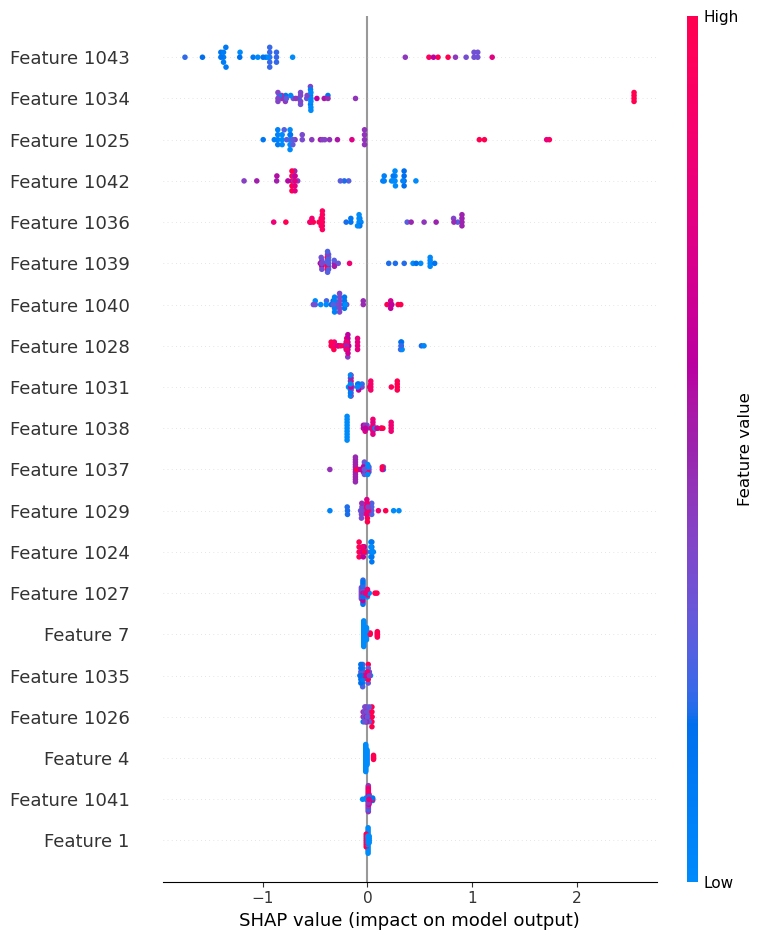

In [57]:
shap.summary_plot(shap_values, X_test, max_display=20)

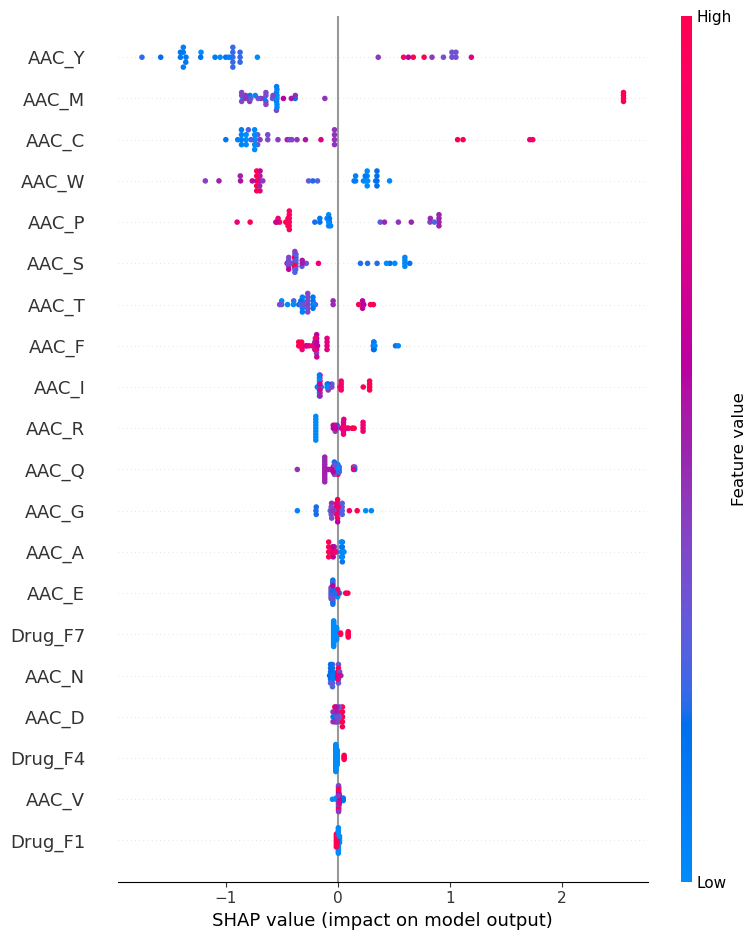

In [58]:
drug_feature_names = [f"Drug_F{i}" for i in range(1024)]
protein_feature_names = [f"AAC_{aa}" for aa in list("ACDEFGHIKLMNPQRSTVWY")]
all_feature_names = drug_feature_names + protein_feature_names

shap.summary_plot(shap_values, X_test, feature_names=all_feature_names, max_display=20)

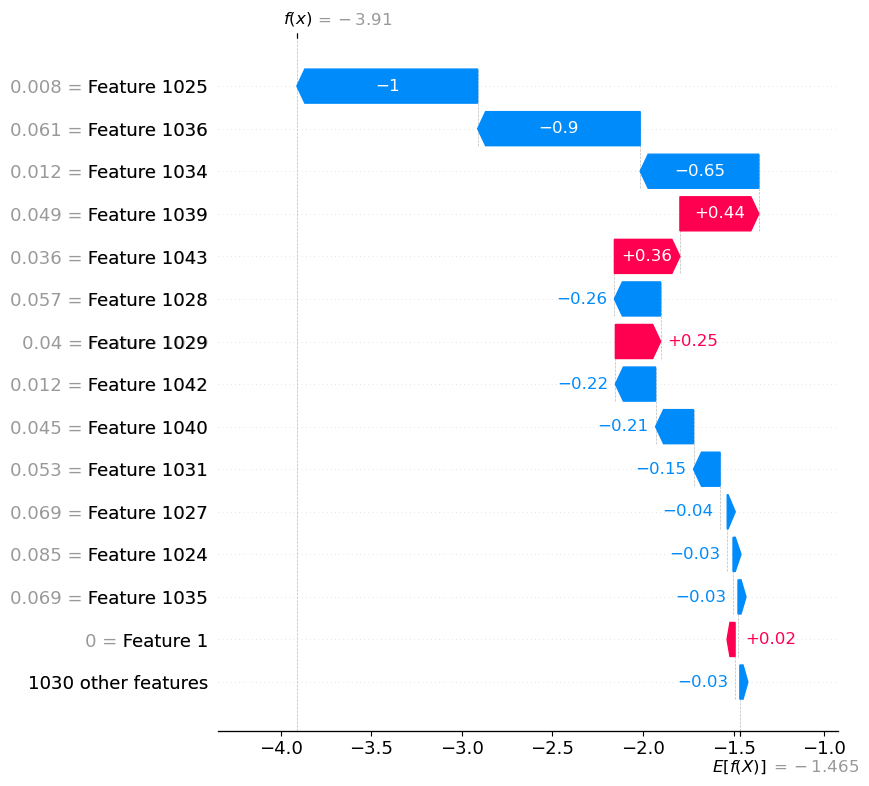

In [59]:
# Choose one example
i = 0
shap.plots.waterfall(shap_values[i], max_display=15)

## Takeaways

## This gives you a professional-level breakdown of:

### Which ECFP bits or amino acid patterns drive predictions

### Whether high/low values increase or decrease predicted activity

### Transparency for publication, documentation, or interviews